Today, we will analyze sc lineage tracing data with [CoSpar Wang et al 2022](https://www.nature.com/articles/s41587-022-01209-1)

Much of the tutorial today comes straight from [CoSpar's documentation](https://cospar.readthedocs.io/en/latest/index.html)


<figure>
<img src="img/cospar_schematic.png">
    <figcaption>CoSpar Overview. The transition matrix T computed by maximum likelihood estimation.</figcaption>
    </figure>

In [ ]:
#!pip3 install cospar

In [1]:
import cospar as cs
import scanpy as sc
cs.settings.verbosity=2

In [2]:
cs.settings.set_figure_params()

Data from [Weinreb et al Science 2020](https://pubmed.ncbi.nlm.nih.gov/31974159/).

<figure>
<img src="img/hspc_weinreb_schematic.png">
    <figcaption>Data collection strategy.</figcaption>
    </figure>


In [3]:
adata_orig = sc.read_h5ad("adata_cospar_hspc.h5ad")

Required slots in annData for CoSpar:

- adata.X: state count matrix, shape (n_cell, n_gene). This should not be log-normalized.

- adata.var_names: list of gene names, shape (n_genes,).

- adata.obs[‘time_info’]: time annotation (type: str) for each cell, shape (n_cell,).

- adata.obs[‘state_info’]: state annotation for each cell, shape (n_cell, 1). [Optional. Can be generated in preprocessing.

- adata.obsm[‘X_clone’]: clonal labels for each cell in the form of np.array or sparse matrix, shape (n_cell, n_clone).

- adata.obsm[‘X_pca’]: PCA matrix, shape (n_cell, n_pcs). [Optional. Can be generated in preprocessing.

- adata.obsm[‘X_emb’]: two-dimensional embedding, shape (n_cell, 2). [Optional. Can be generated in preprocessing.

In [2]:
cs.hf.set_up_folders() # NB we did not run this in lecture but will be necessary

NameError: name 'cs' is not defined

In [4]:
adata_orig

AnnData object with n_obs × n_vars = 7438 × 25289
    obs: 'time_info', 'state_info'
    uns: 'clonal_time_points', 'data_des', 'state_info_colors', 'time_info_colors', 'time_ordering'
    obsm: 'X_clone', 'X_emb', 'X_pca'

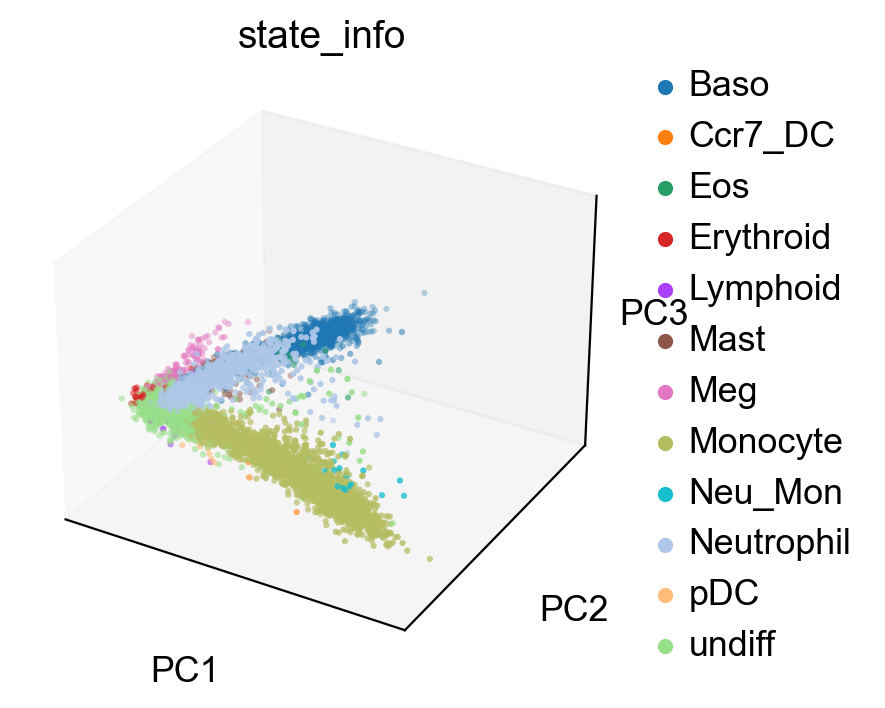

In [5]:
sc.pl.pca(adata_orig, color='state_info', projection='3d')

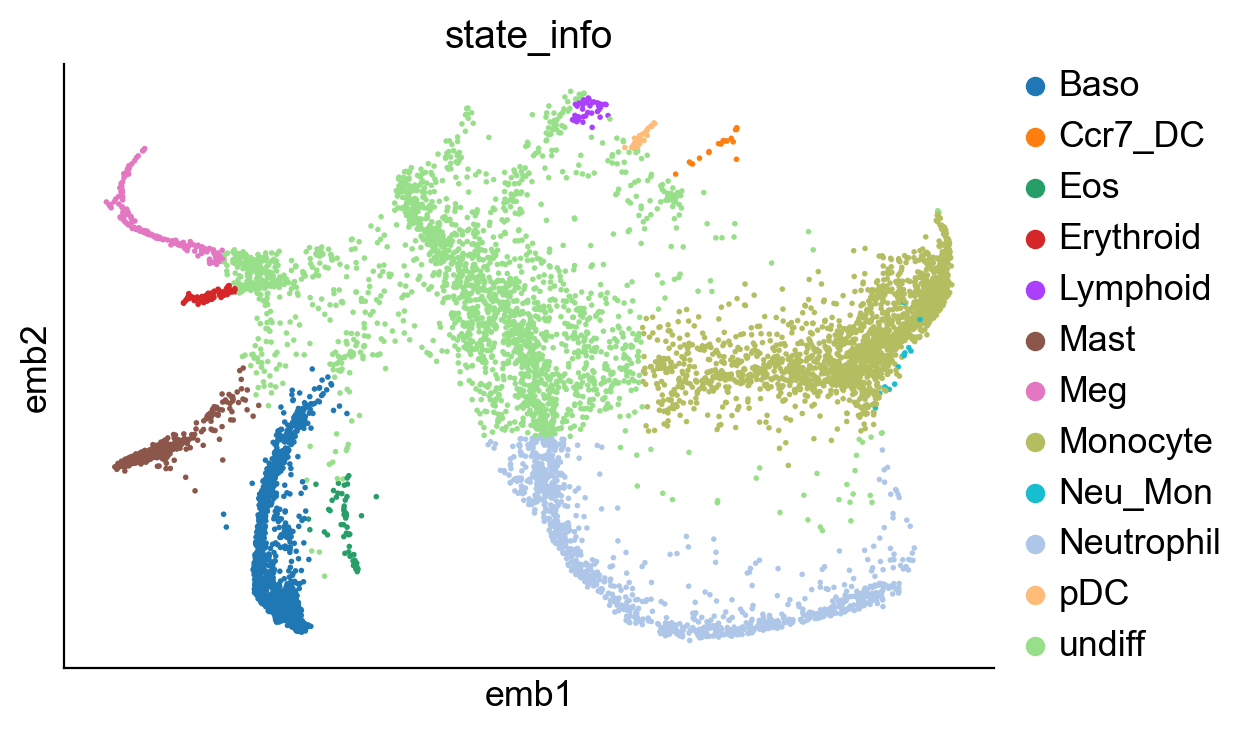

In [6]:
sc.pl.embedding(adata_orig, basis="emb",color="state_info")

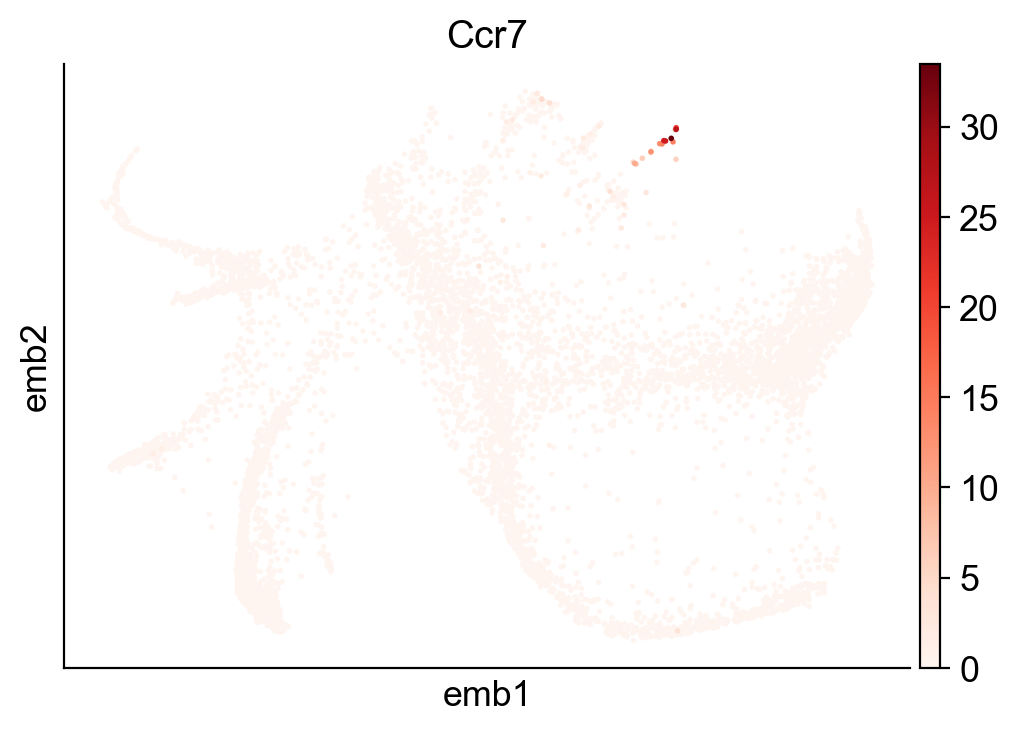

In [7]:
sc.pl.embedding(adata_orig, basis="emb",color=['Ccr7'])

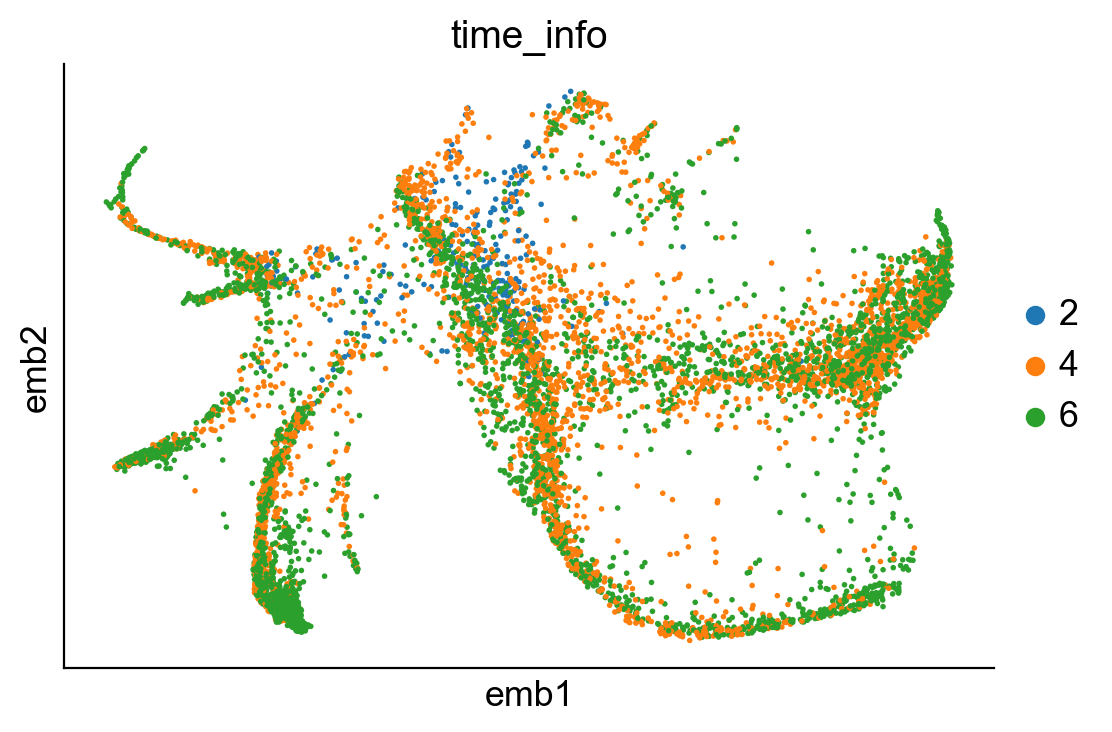

In [8]:
sc.pl.embedding(adata_orig, basis="emb",color=['time_info'])

We can examine the location of clones on embeddings

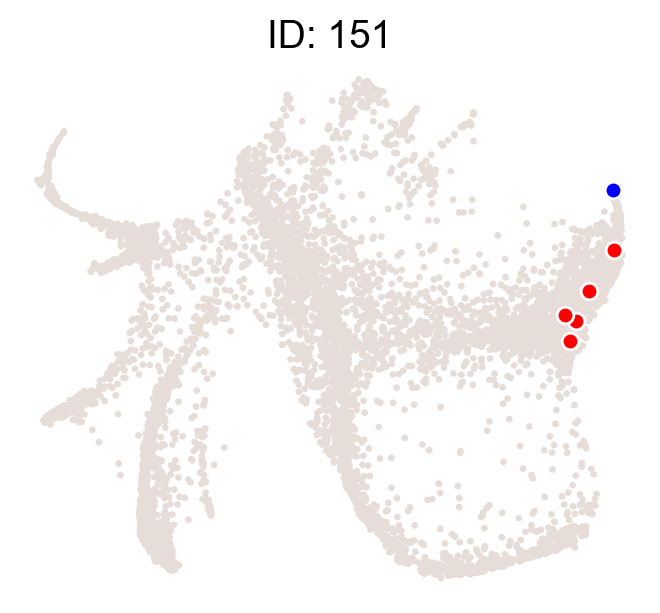

In [9]:
cs.pl.clones_on_manifold(adata_orig,selected_clone_list=[151],color_list=['black','red','blue'])

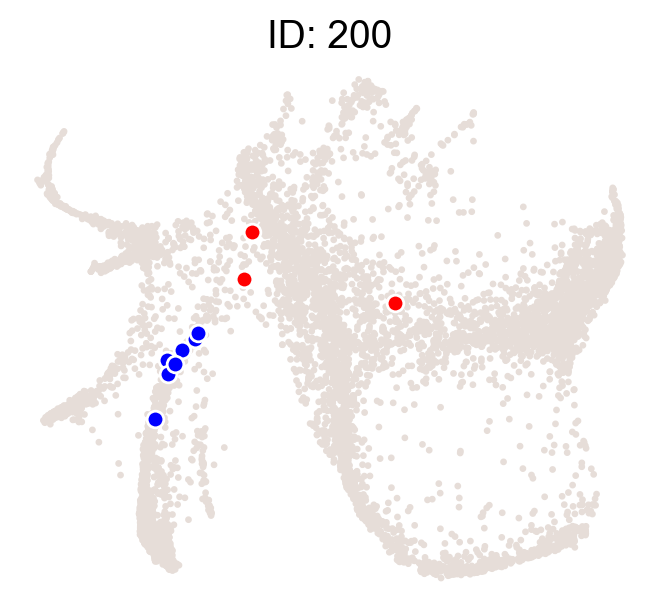

In [10]:
cs.pl.clones_on_manifold(adata_orig,selected_clone_list=[200],color_list=['black','red','blue'])

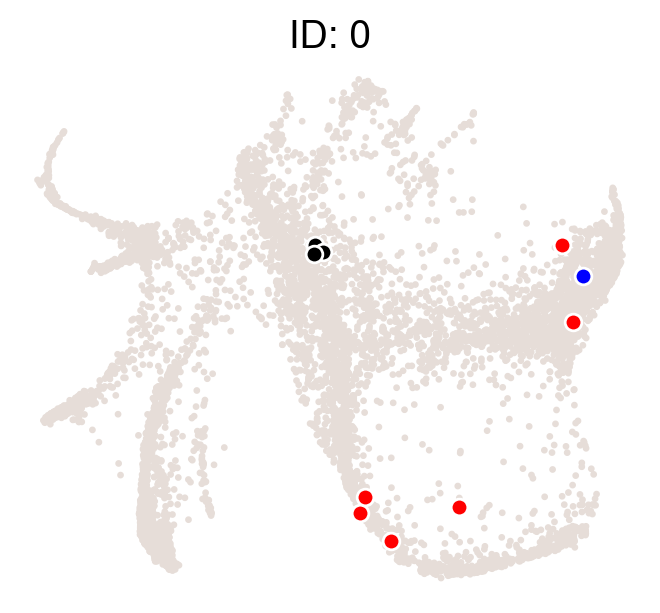

In [11]:
cs.pl.clones_on_manifold(adata_orig,selected_clone_list=[0],color_list=['black','red','blue'])

How often are clones shared across cell types? 
This analysis done for given time point

Results saved as dictionary at adata.uns['fate_coupling_X_clone']


<AxesSubplot:title={'center':'source: X_clone'}>

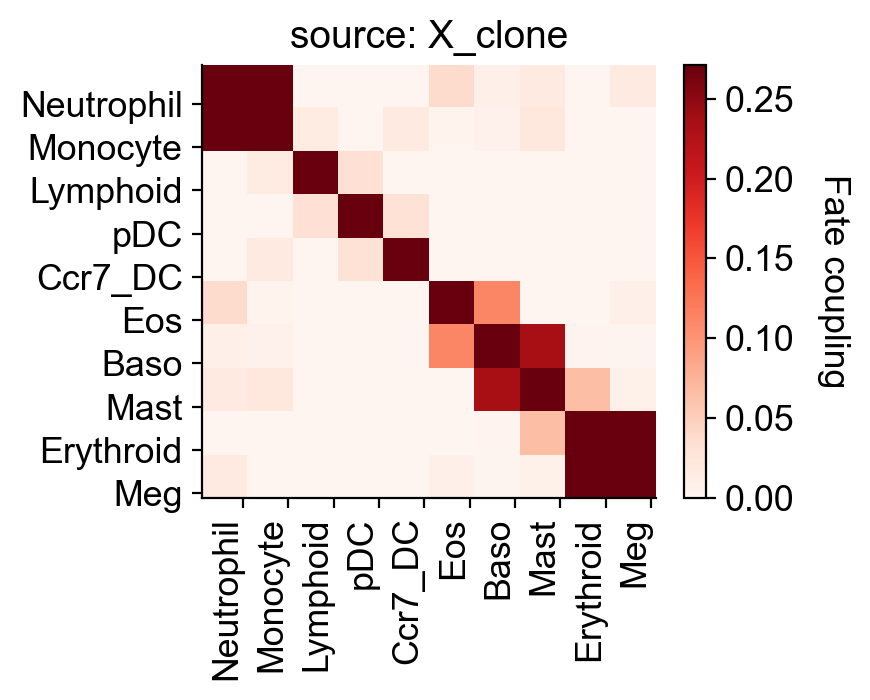

In [12]:
selected_times='4'
selected_fates=['Ccr7_DC','Mast','Meg','pDC','Eos','Lymphoid','Erythroid','Baso',  'Neutrophil', 'Monocyte']
cs.tl.fate_coupling(adata_orig,source='X_clone',selected_fates=selected_fates,selected_times=selected_times)
cs.pl.fate_coupling(adata_orig,source='X_clone')

Results saved as dictionary at adata.uns['fate_coupling_X_clone']


<AxesSubplot:title={'center':'source: X_clone'}>

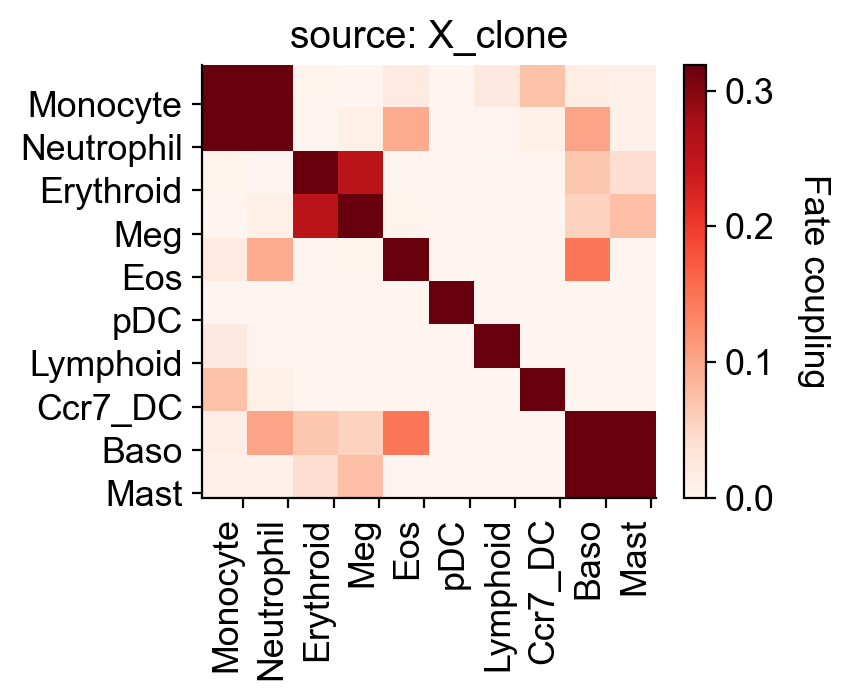

In [14]:
selected_times='6'
selected_fates=['Ccr7_DC','Mast','Meg','pDC','Eos','Lymphoid','Erythroid','Baso',  'Neutrophil', 'Monocyte']
cs.tl.fate_coupling(adata_orig,source='X_clone',selected_fates=selected_fates,selected_times=selected_times)
cs.pl.fate_coupling(adata_orig,source='X_clone')

We can look at barcode distributions across cell types, too

Data saved at adata.uns['barcode_heatmap']


<AxesSubplot:>

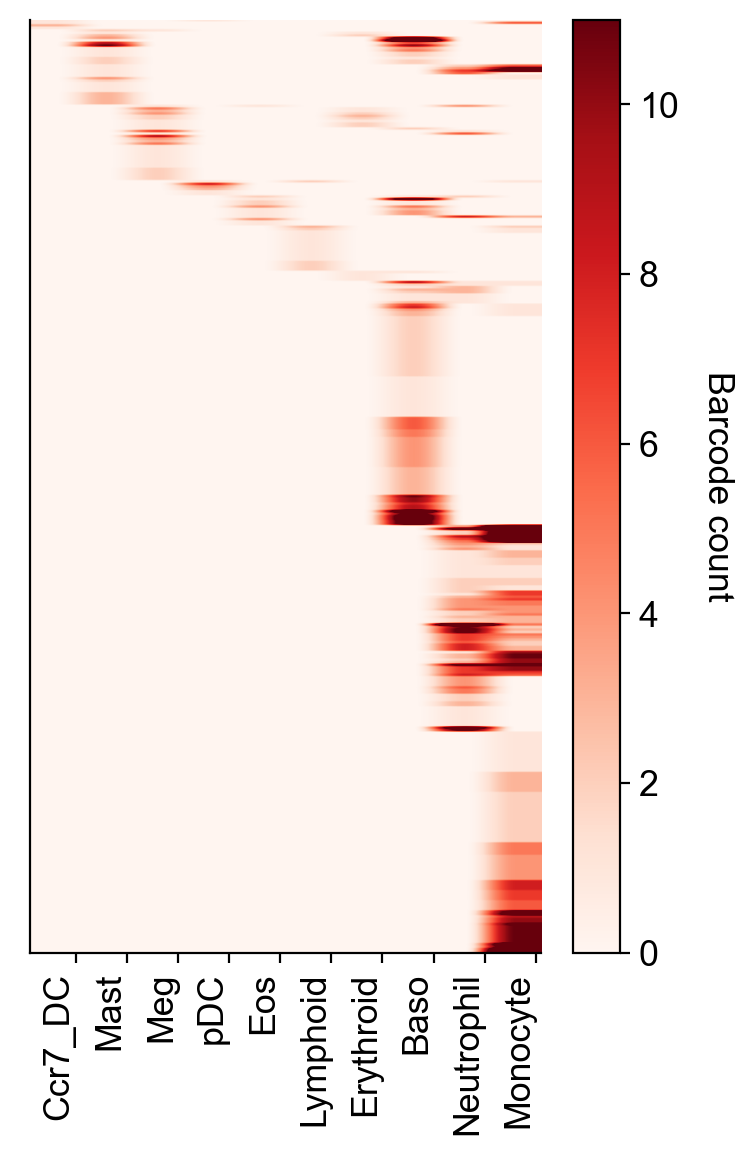

In [15]:
selected_times='4'
selected_fates=['Ccr7_DC','Mast','Meg','pDC','Eos','Lymphoid','Erythroid','Baso',  'Neutrophil', 'Monocyte']
cs.pl.barcode_heatmap(adata_orig,selected_times=selected_times, selected_fates=selected_fates, color_bar=True)


In [16]:
adata=cs.tmap.infer_Tmap_from_multitime_clones(adata_orig,clonal_time_points=['2','4','6'],later_time_point='6',
        smooth_array=[20,15,10],sparsity_threshold=0.2,max_iter_N=3)

Trying to set attribute `._uns` of view, copying.


------Compute the full Similarity matrix if necessary------
------Infer transition map between initial time points and the later time one------
--------Current initial time point: 2--------
Step 1: Select time points
Number of multi-time clones post selection: 185
Step 2: Optimize the transition map recursively
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Convergence (CoSpar, iter_N=3): corr(previous_T, current_T)=0.953
--------Current initial time point: 4--------
Step 1: Select time points
Number of multi-time clones post selection: 500
Step 2: Optimize the transition map recursively
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Convergence (CoSpar, iter_N=3): corr(previous_T, current_T)=0.974
-----------Total used time: 19.995919227600098 s ------------


In [17]:
adata

AnnData object with n_obs × n_vars = 7438 × 25289
    obs: 'time_info', 'state_info'
    uns: 'clonal_time_points', 'data_des', 'state_info_colors', 'time_info_colors', 'time_ordering', 'available_map', 'fate_coupling_X_clone', 'barcode_heatmap', 'Tmap_cell_id_t1', 'Tmap_cell_id_t2', 'clonal_cell_id_t1', 'clonal_cell_id_t2', 'sp_idx', 'transition_map', 'intraclone_transition_map'
    obsm: 'X_clone', 'X_emb', 'X_pca'

In [ ]:
adata.uns['transition_map'].shape

Now, given an state, we can examine it's likely trajectory using the transition matrix just computed


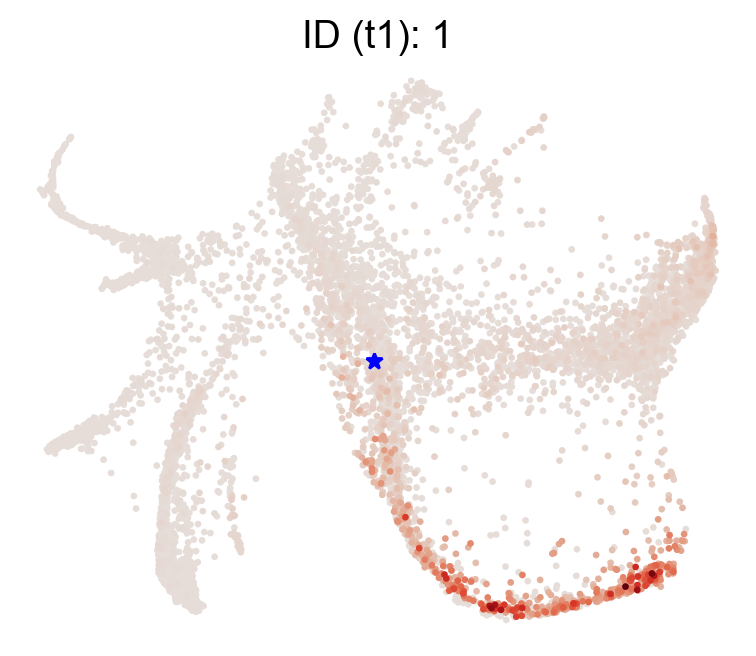

In [18]:
selected_state_id_list=[1]

cs.pl.single_cell_transition(adata,selected_state_id_list=selected_state_id_list, color_bar=False,
                                    source='transition_map',map_backward=False)

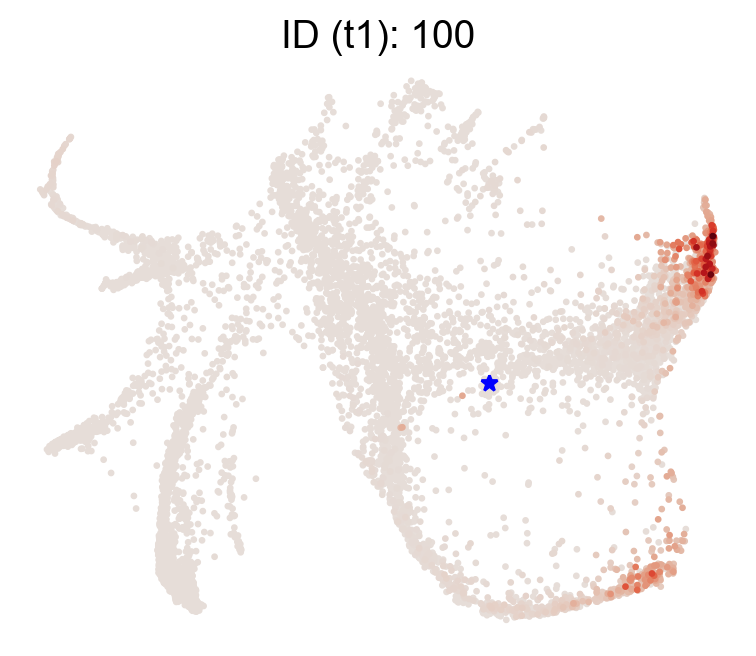

In [19]:
selected_state_id_list=[100]

cs.pl.single_cell_transition(adata,selected_state_id_list=selected_state_id_list, color_bar=False,
                                    source='transition_map',map_backward=False)

Similarly, we can compute transition profiles for end states (where did they originate)?

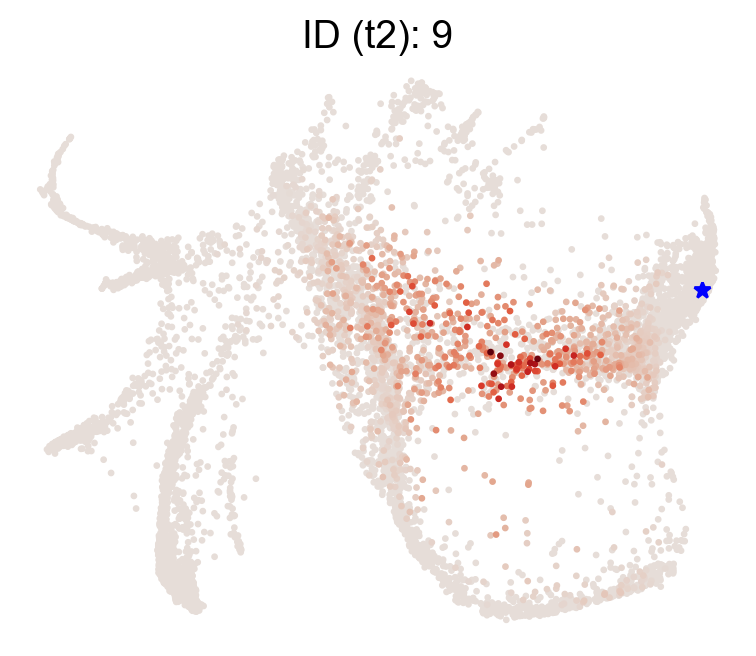

In [20]:
selected_state_id_list=[9]
cs.pl.single_cell_transition(adata,selected_state_id_list=selected_state_id_list, color_bar=False,
                                    source='transition_map',map_backward=True)

Now let's examine a fate map. Given a cluster/state/end-point, where did it originate?

Results saved at adata.obs['fate_map_transition_map_Neutrophil']
Results saved at adata.obs['fate_map_transition_map_Monocyte']


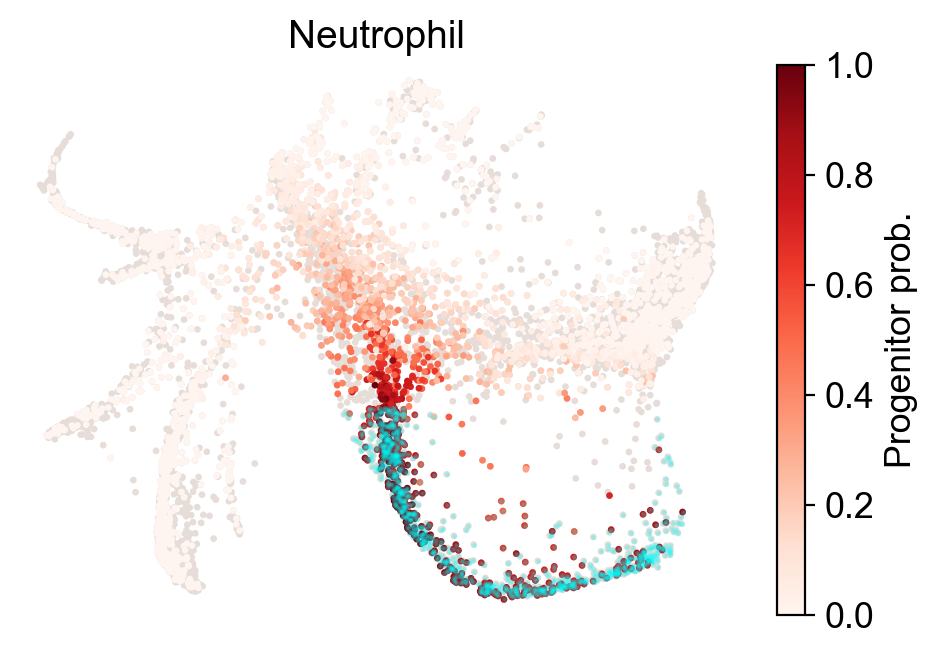

In [21]:
cs.tl.fate_map(adata,selected_fates=['Neutrophil','Monocyte'],
               source='transition_map',map_backward=True)
cs.pl.fate_map(adata,selected_fates=['Neutrophil'],
               source='transition_map',plot_target_state=True,show_histogram=False)

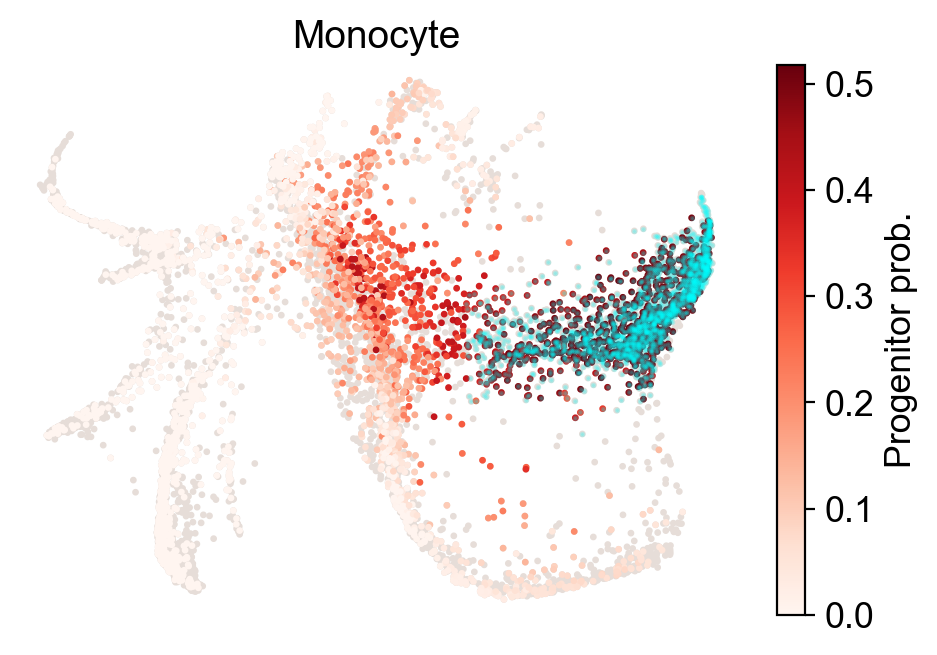

In [22]:
cs.pl.fate_map(adata,selected_fates=['Monocyte'],
               source='transition_map',plot_target_state=True,show_histogram=False)

Compute fate potency as the normalized sum of potential endpoints

Results saved at adata.obs['fate_map_transition_map_Erythroid']
Results saved at adata.obs['fate_map_transition_map_Lymphoid']
Results saved at adata.obs['fate_map_transition_map_Eos']
Results saved at adata.obs['fate_map_transition_map_pDC']
Results saved at adata.obs['fate_map_transition_map_undiff']
Results saved at adata.obs['fate_map_transition_map_Neutrophil']
Results saved at adata.obs['fate_map_transition_map_Monocyte']
Results saved at adata.obs['fate_map_transition_map_Mast']
Results saved at adata.obs['fate_map_transition_map_Baso']
Results saved at adata.obs['fate_map_transition_map_Ccr7_DC']
Results saved at adata.obs['fate_map_transition_map_Neu_Mon']
Results saved at adata.obs['fate_map_transition_map_Meg']
Results saved at adata.obs['fate_potency_transition_map']


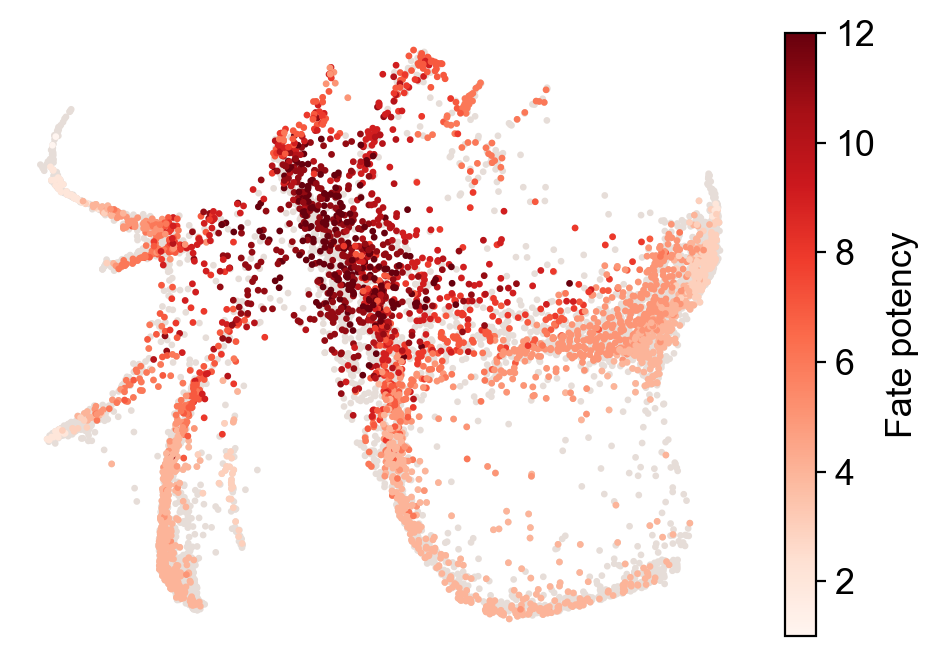

In [23]:
cs.tl.fate_potency(adata,source='transition_map',
            map_backward=True,method='norm-sum',fate_count=True)
cs.pl.fate_potency(adata,source='transition_map')

Now let's examine fate bias between two cell types/states/endpoints a and b. Computed as Pr(endstate = a) / Pr(endstate=a) + Pr(endstate=b)

Results saved at adata.obs['fate_map_transition_map_Neutrophil']
Results saved at adata.obs['fate_map_transition_map_Monocyte']
Results saved at adata.obs['fate_bias_transition_map_Neutrophil*Monocyte']


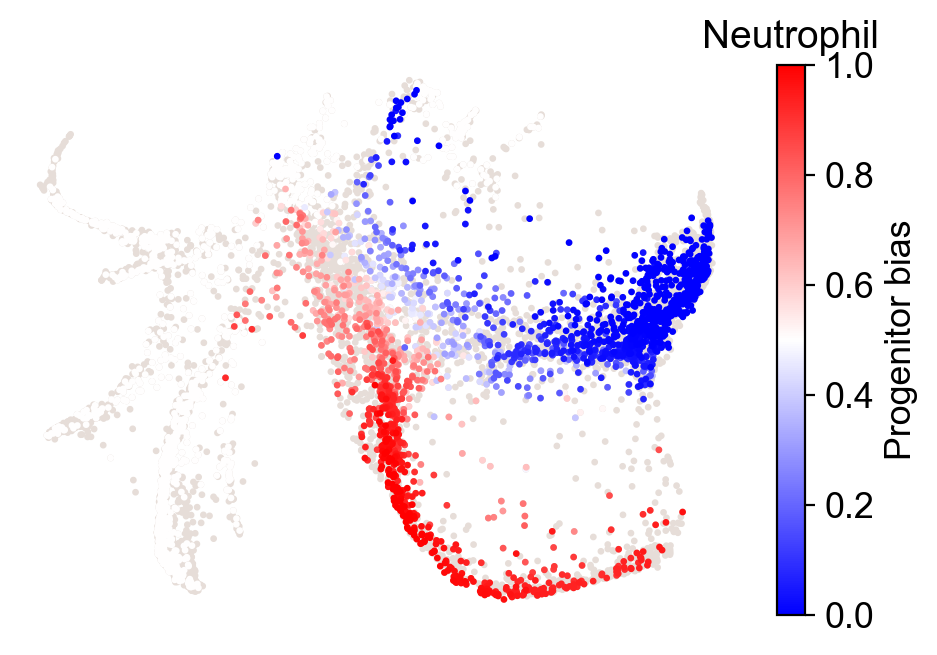

In [24]:
cs.tl.fate_bias(adata,selected_fates=['Neutrophil','Monocyte'],source='transition_map',pseudo_count=0,sum_fate_prob_thresh=0.1)
cs.pl.fate_bias(adata,selected_fates=['Neutrophil','Monocyte'],source='transition_map',plot_target_state=False,selected_times=['4'])

Fate coupling from transition matrix


Results saved as dictionary at adata.uns['fate_coupling_transition_map']


<AxesSubplot:title={'center':'source: transition_map'}>

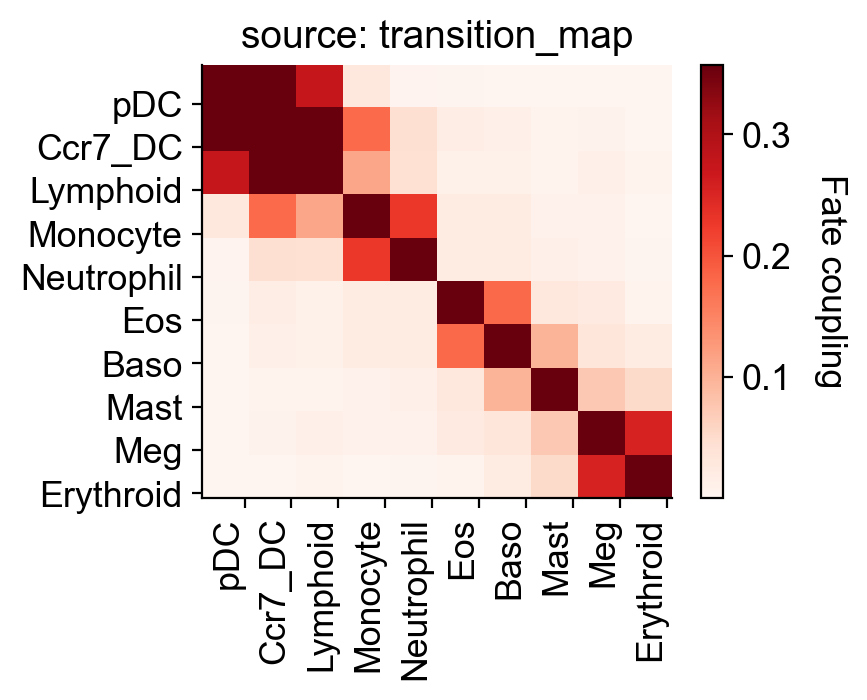

In [25]:
selected_fates=['Ccr7_DC','Mast','Meg','pDC','Eos','Lymphoid','Erythroid','Baso',  'Neutrophil', 'Monocyte']
cs.tl.fate_coupling(adata,selected_fates=selected_fates,source='transition_map')
cs.pl.fate_coupling(adata,source='transition_map')

Results saved as dictionary at adata.uns['fate_coupling_X_clone']


<AxesSubplot:title={'center':'source: X_clone'}>

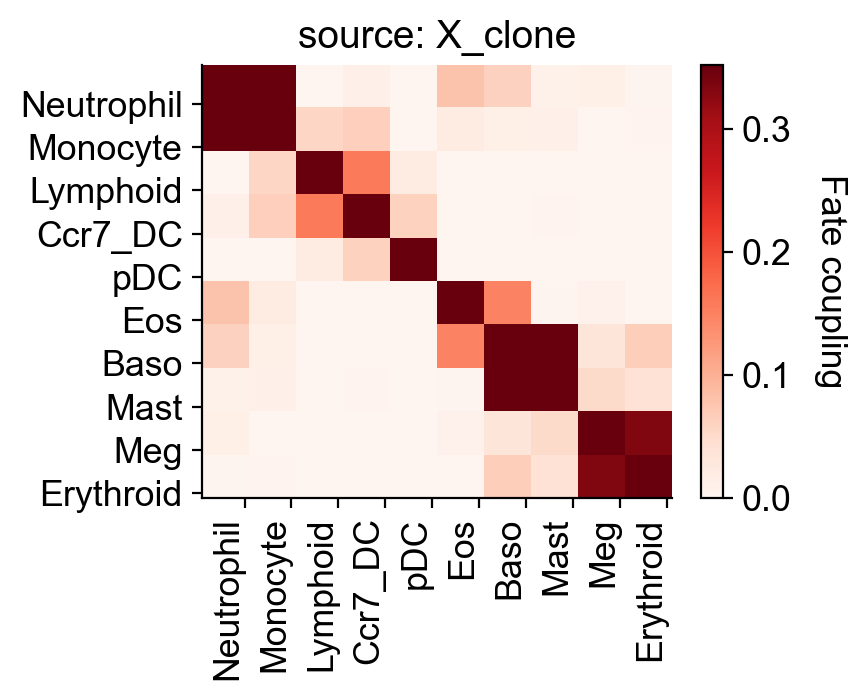

In [26]:
# compared to from clonal data alone
cs.tl.fate_coupling(adata,selected_fates=selected_fates,source='X_clone')
cs.pl.fate_coupling(adata,source='X_clone')

Now reconstruct the hierarchy

In [27]:
cs.tl.fate_hierarchy(adata,selected_fates=selected_fates,source='transition_map')
cs.pl.fate_hierarchy(adata,source='transition_map')

Results saved as dictionary at adata.uns['fate_hierarchy_transition_map']

            /-Baso
         /-|
      /-|   \-Eos
     |  |
   /-|   \-Mast
  |  |
  |  |   /-Erythroid
  |   \-|
--|      \-Meg
  |
  |      /-Monocyte
  |   /-|
  |  |   \-Neutrophil
   \-|
     |      /-pDC
     |   /-|
      \-|   \-Ccr7_DC
        |
         \-Lymphoid


What distinguishes progenitors likely to become monocytes from those that are likely to become neutrophils?

Results saved at adata.obs['fate_map_transition_map_Neutrophil']
Results saved at adata.obs['fate_map_transition_map_Monocyte']
Results saved at adata.obs['fate_bias_transition_map_Neutrophil*Monocyte']
Results saved at adata.obs[f'progenitor_transition_map_Neutrophil'] and adata.obs[f'diff_trajectory_transition_map_Neutrophil']
Results saved at adata.obs[f'progenitor_transition_map_Monocyte'] and adata.obs[f'diff_trajectory_transition_map_Monocyte']


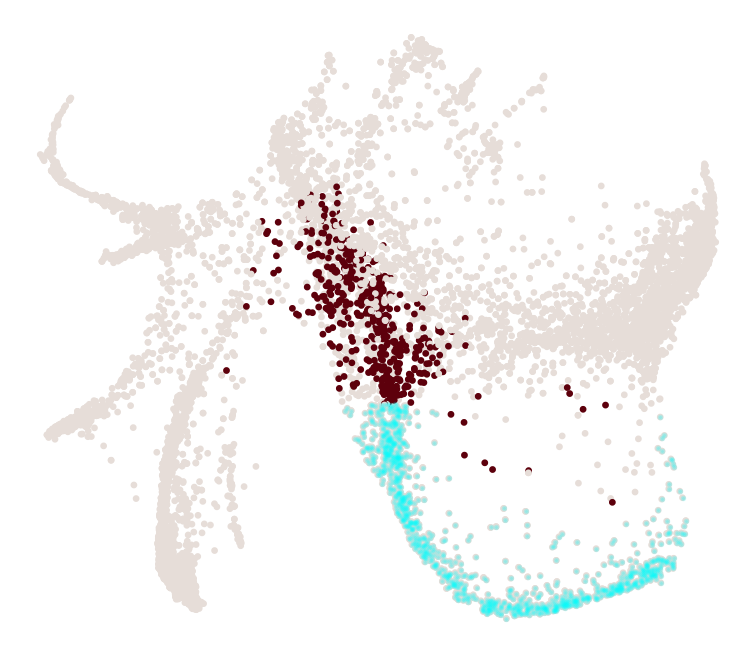

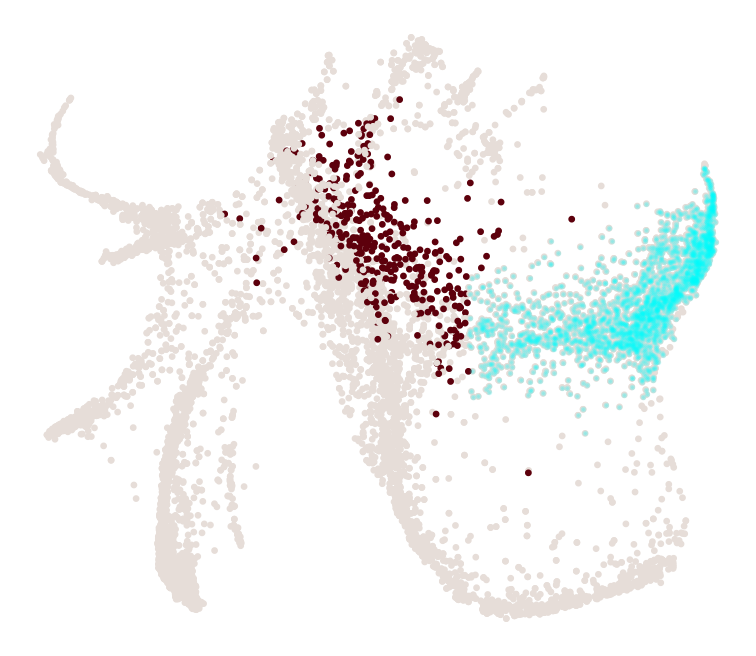

In [28]:
import numpy as np

cs.tl.progenitor(adata, selected_fates=['Neutrophil','Monocyte'],
 source='transition_map', map_backward=True,
    bias_threshold_A=0.5,bias_threshold_B=0.5, sum_fate_prob_thresh=0.2, avoid_target_states=True)
cs.pl.progenitor(adata, selected_fates=['Neutrophil','Monocyte'],
 source='transition_map')


note that resuls are stored as follows:

`adata.obs[f'progenitor_{source}_{fate_name}']`

`adata.obs[f'diff_trajectory_{source}_{fate_name}']`


In [29]:

cell_group_A=np.array(adata.obs['diff_trajectory_transition_map_Neutrophil'])
cell_group_B=np.array(adata.obs['diff_trajectory_transition_map_Monocyte'])
dge_gene_A, dge_gene_B=cs.tl.differential_genes(adata,cell_group_A=cell_group_A,cell_group_B=cell_group_B,FDR_cutoff=0.05)

In [30]:
dge_gene_A

index      gene         Qvalue    mean_1     mean_2     ratio
0         5      Mmp8   0.000000e+00  0.563468  11.657158 -3.017132
1         1    Wfdc17   0.000000e+00  0.078693   7.124163 -2.912935
2         9       Lpl  2.733934e-267  0.240403   8.100443 -2.875127
3        10     Fabp5  1.209024e-246  1.652049  15.526230 -2.639579
4         3      Psap   0.000000e+00  1.660915  14.049889 -2.499758
...     ...       ...            ...       ...        ...       ...
1067   2060     H3f3a   7.928128e-04  4.989668   5.169685 -0.042721
1068   3290  AB124611   4.108763e-02  0.605892   0.648909 -0.038136
1069   3124      Tmpo   3.081903e-02  0.922378   0.929656 -0.005451
1070   2697     Ffar2   1.080521e-02  0.608486   0.609789 -0.001169
1071   2857      Nom1   1.716971e-02  0.235725   0.236709 -0.001149

[1072 rows x 6 columns]

In [31]:
dge_gene_B

index    gene         Qvalue     mean_1    mean_2     ratio
0        36     Ngp  5.649159e-144  54.840271  0.418010  5.299366
1        33  S100a9  1.356053e-148  80.231552  8.239202  3.136200
2        38  S100a8  1.789692e-139  48.096233  8.031301  2.442606
3        21   Elane  8.662786e-184   8.812663  1.012724  2.285495
4       222    Camp   2.724041e-46   4.027065  0.032162  2.284047
...     ...     ...            ...        ...       ...       ...
2320   3044  Tex261   2.636864e-02   0.307811  0.299247  0.009477
2321   3154  Ndufs4   3.271385e-02   0.158712  0.151988  0.008397
2322   2164   Bub1b   1.311236e-03   0.291533  0.285507  0.006747
2323   3128   Socs2   3.108334e-02   0.247205  0.242337  0.005642
2324   3392   Trpm7   4.928712e-02   0.231395  0.227887  0.004117

[2325 rows x 6 columns]

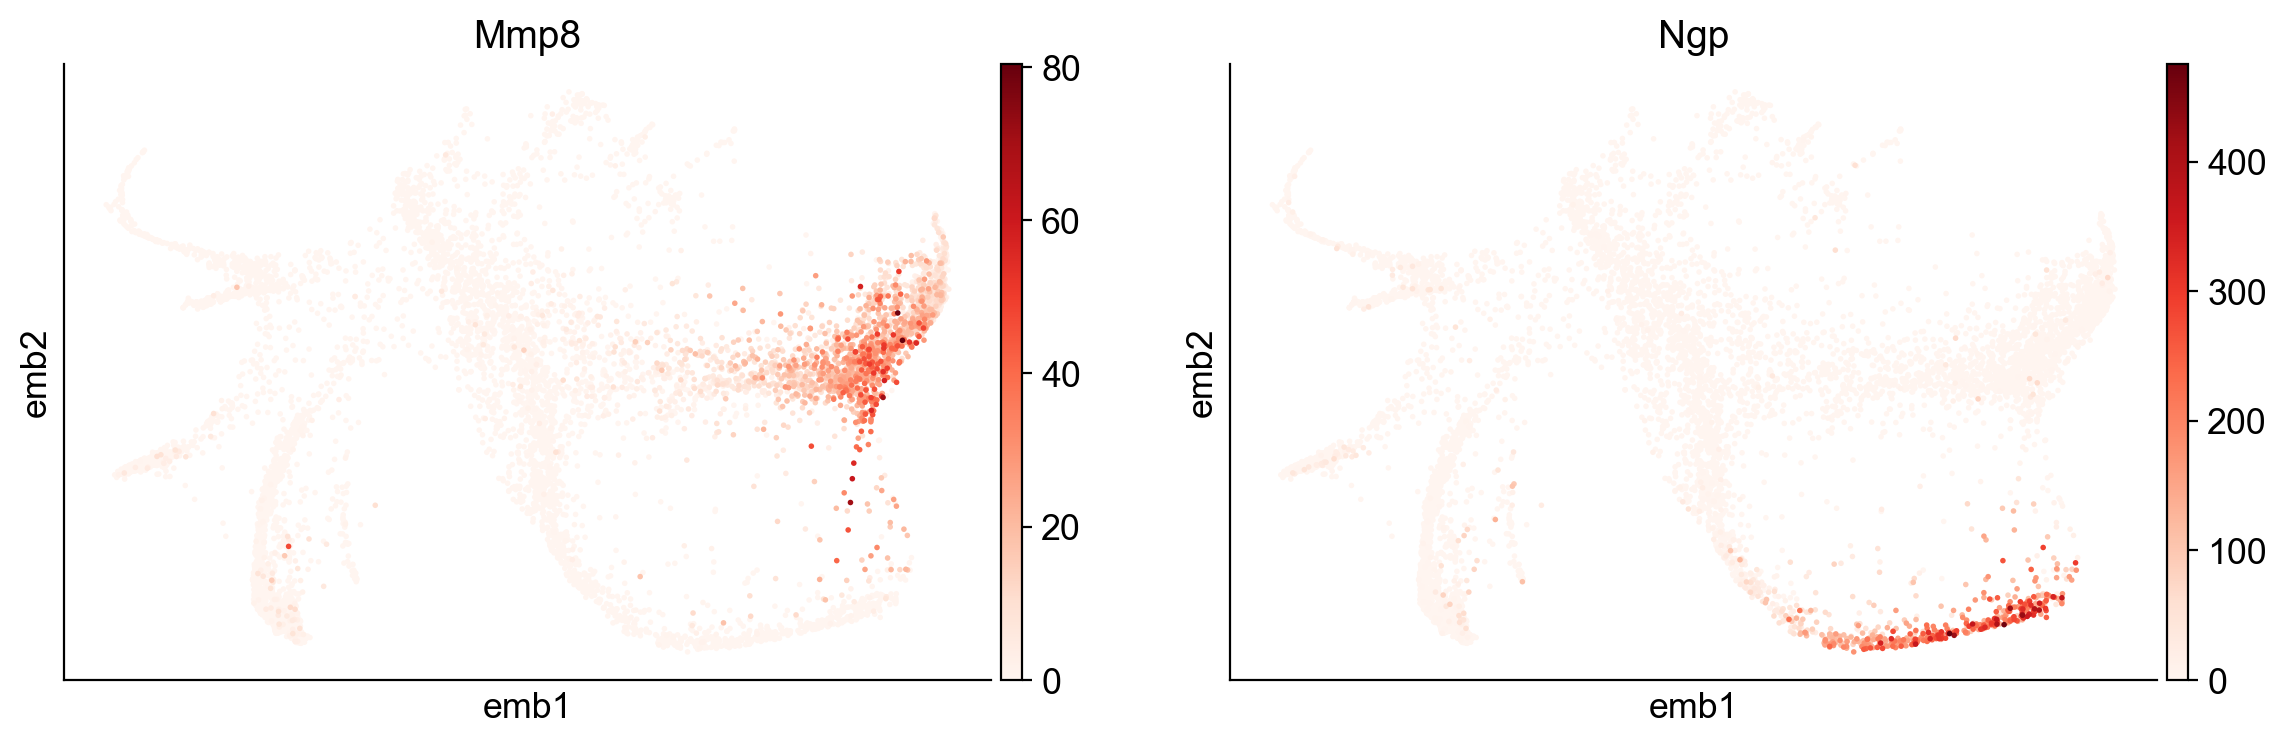

In [32]:
sc.pl.embedding(adata, basis="emb",color=['Mmp8', 'Ngp'])

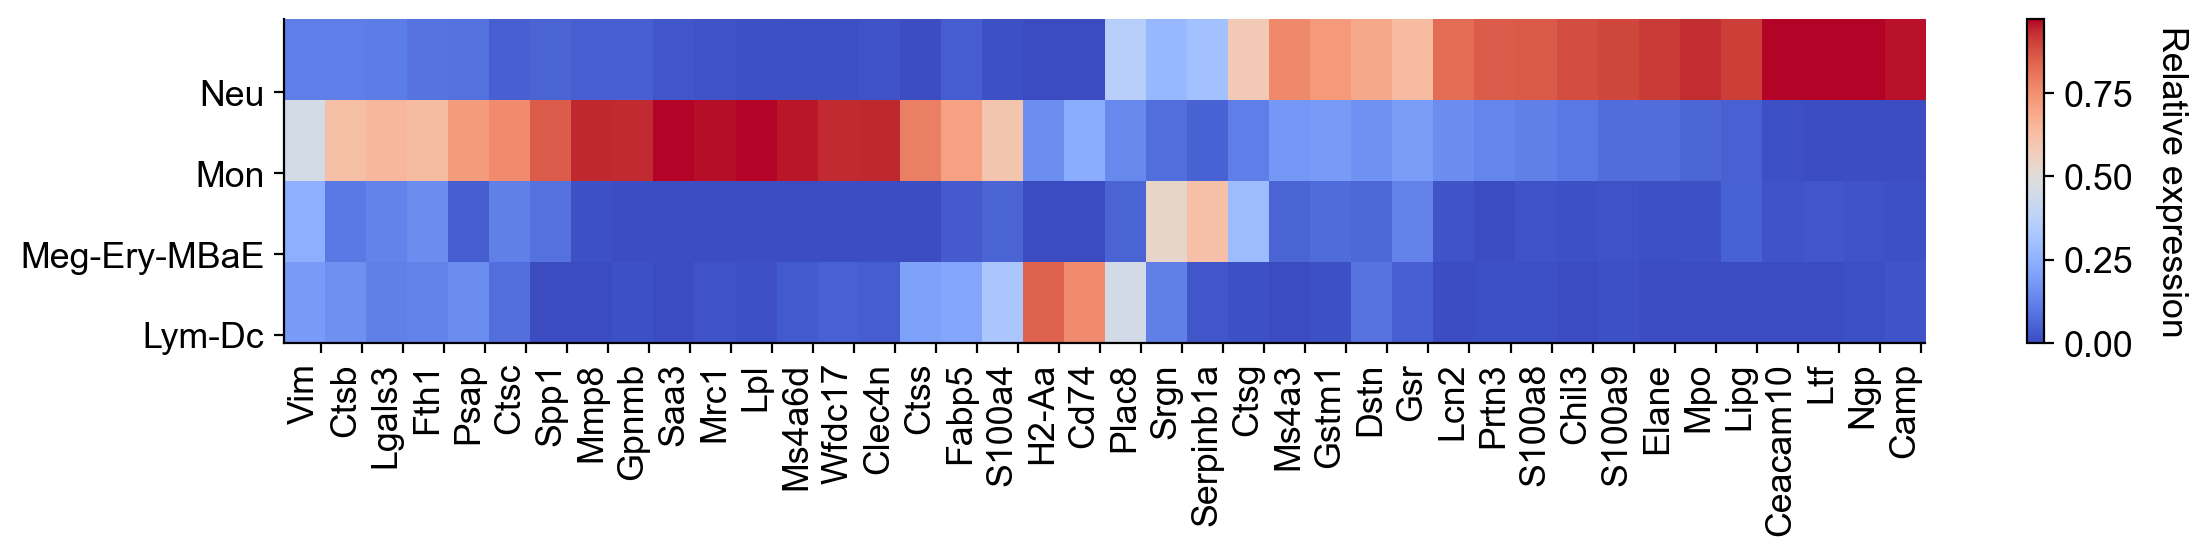

In [33]:
gene_list=list(dge_gene_A['gene'][:20])+list(dge_gene_B['gene'][:20]) #select the top 20 genes from both populations

selected_fates=['Neutrophil','Monocyte',['Baso','Eos','Erythroid','Mast','Meg'],['pDC','Ccr7_DC','Lymphoid']]
renames=['Neu','Mon','Meg-Ery-MBaE','Lym-Dc']
gene_expression_matrix=cs.pl.gene_expression_heatmap(adata,selected_genes=gene_list,selected_fates=selected_fates,
                            rename_fates=renames,fig_width=12)

To identify undifferentiated cells that are biased towards either of these lineages, do the following:

In [3]:

cell_group_A=np.array(adata.obs['progenitor_transition_map_Neutrophil'])
cell_group_B=np.array(adata.obs['progenitor_transition_map_Monocyte'])


NameError: name 'np' is not defined

Perform differential gene expression analysis between these two groups of undiff cells. You may need to adjust FDR_cutoff.

In [ ]:
dge_gene_A, dge_gene_B=cs.tl.differential_genes(adata,cell_group_A=cell_group_A,cell_group_B=cell_group_B,FDR_cutoff=0.05)
